## **1- Predicting Health Insurance Price**

This Linear Regression consists on predict a health plan price from the age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
insurance = pd.read_csv('plano_saude.csv')

In [5]:
insurance.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


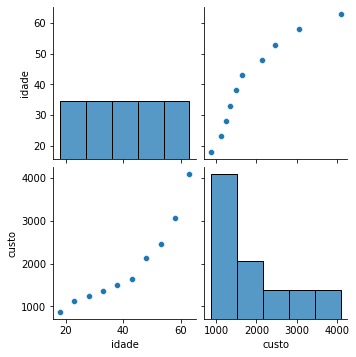

In [8]:
sns.pairplot(insurance)

**Separating data**



In [44]:
X = insurance[['idade']]
y = insurance[['custo']]

**Model**

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

In [48]:
# b0 constant
lm.intercept_

array([-558.94909091])

In [49]:
# b1 declive da reta
lm.coef_

array([[61.86787879]])

Text(0, 0.5, 'Price')

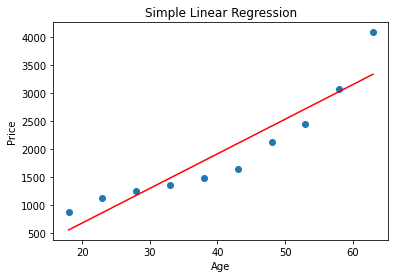

In [50]:
plt.scatter(X,y)
plt.plot(X, lm.predict(X), color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Price')

**Predicting a random value**

Imagining we wanna know how much is the price for a person with 40 years old.

In [53]:
predict1 = lm.predict([[40]])
predict1

array([[1915.76606061]])

**Score**

We can check how good is our model. Next to 1 is the best score.

In [55]:
score = lm.score(X, y)
score

0.8666112727879174

--------------------------------------------------------
## **2- Predicting House Prices**

This Linear Regression consists on predict the house price based on it's features.

In [56]:
house = pd.read_csv('house_prices.csv')

In [57]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Separating data**



In [73]:
X = house[['sqft_living']]
y = house[['price']]

**Model**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# b0 constant
lm.intercept_

array([-37256.42536878])

In [78]:
# b1 declive da reta
lm.coef_

array([[277.50853204]])

**Model Validation**

In [79]:
score = lm.score(X, y)
score

0.4927923115622426

Text(0, 0.5, 'Price')

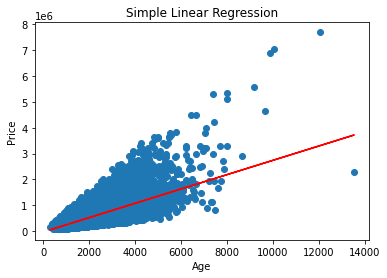

In [80]:
plt.scatter(X,y)
plt.plot(X, lm.predict(X), color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Price')

In [81]:
from sklearn import metrics

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 139544.6922493929
MSE: 47260246288.38432
RMSE: 217394.21861766317


    Our model is missing about $139.544 for more or less.

In [83]:
# Testing data
lm.score(X_test, y_test)

0.5100465327740267

--------------------------------------------------------
## **2.1- Predicting House Prices**

This Multiple Linear Regression consists on predict the house price based on it's features.

In [84]:
house = pd.read_csv('house_prices.csv')

**Separating data**



In [98]:
X = house.iloc[:, 3:19].values # from feature 3 to 18
y = house[['price']]

**Model**

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Validation**

In [103]:
score = lm.score(X_train, y_train)
score

0.6951216382617798

In [104]:
previsoes = lm.predict(X_test)

In [105]:
from sklearn.metrics import mean_absolute_error

In [106]:
print('MAE:', metrics.mean_absolute_error(y_test, previsoes))
print('MSE:', metrics.mean_squared_error(y_test, previsoes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, previsoes)))

MAE: 126299.7166472361
MSE: 41173879000.25321
RMSE: 202913.4766353709


    Our model is missing about $126.299 for more or less.

In [107]:
# b0
lm.intercept_

array([9573706.11590901])